In [27]:
# Problem Statement
# A retail company “ABC Private Limited” wants to understand the customer purchase behaviour 
# (specifically, purchase amount) against various products of different categories. 
# They have shared purchase summary of various customers for selected high volume products from last month.

# The data set also contains 
# customer demographics (age, gender, marital status, city_type, stay_in_current_city), 
# product details (product_id and product category) 
# and Total purchase_amount from last month.

# Now, they want to build a model to predict the purchase amount of customer against 
# various products which will help them to create personalized offer for customers against different products.

In [28]:
# Data

# Variable	Definition

# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belong to other category also (Masked)
# Product_Category_3	Product may belong to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)
# Your model performance will be evaluated on the basis of your prediction 
# of the purchase amount for the test data (test.csv), 
# which contains similar data-points as train except for their purchase amount. 
# Your submission needs to be in the format as shown in "SampleSubmission.csv".

# We at our end, have the actual purchase amount for the test dataset, 
# against which your predictions will be evaluated. 
# Submissions are scored on the root mean squared error (RMSE). 
# RMSE is very common and is a suitable general-purpose error metric. 
# Compared to the Mean Absolute Error, RMSE punishes large errors:

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_csv("train.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [31]:
test_data = pd.read_csv("test.csv")
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [32]:
data.shape

(550068, 12)

In [33]:
test_data.shape

(233599, 11)

In [34]:
# We do not need User ID and Product ID
# User ID -> Gender/Age/Occupation/CityCategory/StayinCurrentCity/MaritalStatus
# Product ID -> Product Categories

In [35]:
print(data.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


In [36]:
data.Occupation = data.Occupation.astype(object)
test_data.Occupation = test_data.Occupation.astype(object)

In [37]:
print(data.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                     object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


In [38]:
data.Marital_Status = data.Marital_Status.astype(object)
test_data.Marital_Status = test_data.Marital_Status.astype(object)

In [39]:
for col in data.columns:
    print(data[col].value_counts())

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
1002909     718
1001449     714
1002063     709
1004344     705
1003391     698
1003841     698
1000424     694
1004510     691
1001980     685
1001088     680
1004227     676
1003808     671
1004508     651
1000549     632
1003224     622
1003539     617
1005367     612
1001285     606
1004543     588
1003824     584
           ... 
1001318       9
1004178       9
1004464       9
1005043       9
1003388       9
1003883       9
1005117       9
1002160       9
1002893       9
1002061       9
1004068       9
1002037       9
1004527       8
1003291       8
1002965       8
1002488       8
1000320       8
1003542       8
1002135       8
1003275       8
1005904       8
1004192       8
1005810       7
1005391       7
1002690       7
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5

In [40]:
data.fillna(0, inplace = True)
test_data.fillna(0, inplace = True)

In [41]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [42]:
test_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [43]:
data.drop(["User_ID", "Product_ID"], axis = 1, inplace = True)

In [44]:
test_data.drop(["User_ID", "Product_ID"], axis = 1, inplace = True)

In [45]:
cols = [x for x in data.columns if data[x].dtype == object]
cols

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [46]:
for col in cols:
    print(data[col].unique())
    print(test_data[col].unique())

['F' 'M']
['M' 'F']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['46-50' '26-35' '36-45' '18-25' '51-55' '55+' '0-17']
['A' 'C' 'B']
['B' 'C' 'A']
['2' '4+' '3' '1' '0']
['2' '0' '4+' '1' '3']


In [47]:
data.Product_Category_1 = data.Product_Category_1.astype(object)
data.Product_Category_2 = data.Product_Category_2.astype(object)
data.Product_Category_3 = data.Product_Category_3.astype(object)
test_data.Product_Category_1 = test_data.Product_Category_1.astype(object)
test_data.Product_Category_2 = test_data.Product_Category_2.astype(object)
test_data.Product_Category_3 = test_data.Product_Category_3.astype(object)

In [50]:
for x in ['Occupation','Marital_Status']:
    data[x] = data[x].astype(object)

In [56]:
data.dtypes

Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category_1            object
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object

In [54]:
for x in test_data.columns:
    test_data[x] = test_data[x].astype(object)

In [55]:
test_data.dtypes

Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category_1            object
Product_Category_2            object
Product_Category_3            object
dtype: object

In [57]:
print(sorted(data.Product_Category_1.unique()))
print(sorted(test_data.Product_Category_1.unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [58]:
print(sorted(data.Product_Category_2.unique()))
print(sorted(test_data.Product_Category_2.unique()))

[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


In [59]:
print(sorted(data.Product_Category_3.unique()))
print(sorted(test_data.Product_Category_3.unique()))

[0.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
[0.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


In [27]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [60]:
data_mod = pd.get_dummies(data, columns=[x for x in data.columns if x != "Purchase"])
test_data_mod = pd.get_dummies(test_data, columns=[x for x in test_data.columns])

In [61]:
print([x for x in data_mod.columns if x not in test_data_mod.columns])

['Purchase', 'Product_Category_1_19', 'Product_Category_1_20']


In [62]:
test_data_mod["Product_Category_1_19"] = 0
test_data_mod["Product_Category_1_20"] = 0

In [63]:
print(data_mod.shape)
print(test_data_mod.shape)

(550068, 95)
(233599, 94)


In [66]:
for col in data_mod.columns:
    print(data_mod[col].value_counts())

7011     191
7193     188
6855     187
6891     184
6960     183
7012     183
6879     182
7166     182
7027     182
7165     180
6868     180
6883     180
6858     179
7185     178
6923     178
7089     178
6931     178
7093     178
7114     177
7188     177
7060     176
6908     176
7085     176
7167     175
7159     175
6973     175
7146     175
6928     175
6949     175
7192     174
        ... 
14650      1
15063      1
17112      1
11151      1
3365       1
4724       1
14296      1
10499      1
5687       1
14593      1
23855      1
17366      1
23863      1
10355      1
2931       1
6708       1
349        1
3389       1
14896      1
4868       1
14114      1
208        1
14682      1
14138      1
10290      1
15105      1
14384      1
10453      1
8537       1
14640      1
Name: Purchase, Length: 18105, dtype: int64
0    414259
1    135809
Name: Gender_F, dtype: int64
1    414259
0    135809
Name: Gender_M, dtype: int64
0    534966
1     15102
Name: Age_0-17, dtype: int64
0   

In [65]:
data_mod.head()

,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,8370,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15200,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1422,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1057,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7969,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data_ct = data_mod.copy()

In [37]:
data_ct.shape

(550068, 95)

In [67]:
from sklearn.model_selection import train_test_split

x = data_mod.drop("Purchase", axis = 1)
y = data_mod.Purchase

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 101)
x_train.shape

(412551, 94)

In [68]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)

In [69]:
from sklearn.metrics import mean_squared_error

print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

print(mean_squared_error(pred_test,y_test))
print(mean_squared_error(pred_train,y_train))

0.6483837507918064
0.6462915983704517
8914162.302166278
8875029.562568022


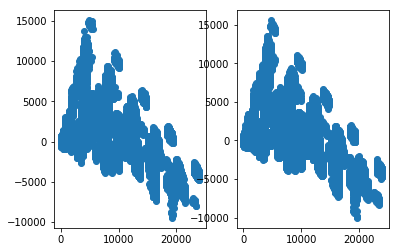

In [38]:
#Residual plot

fig , axes = plt.subplots(1,2)

#plt.scatter(y_test, pred_test-y_test)

axes[0].scatter(y_test, pred_test-y_test)
axes[1].scatter(y_train, pred_train-y_train)

In [70]:
#perform xgboost
import xgboost as xgb

In [91]:
xgb_m = xgb.XGBRegressor(objective ='reg:squarederror', 
                         colsample_bytree = 0.3, 
                         learning_rate = 0.1, 
                         max_depth = 5, 
                         n_estimators = 100)

# base_score=0.1,
# gamma= 2,
# learning_rate= 0.1,
# max_depth= 5,
# min_child_weight= 5,
# n_estimators= 100,
# subsample= 0.9,
# objective = 'reg:squarederror',
# n_jobs = -1



In [92]:
xgb_m.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [93]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, xgb_m.predict(x_test)))
print(mean_squared_error(y_train, xgb_m.predict(x_train)))
print(xgb_m.score(x_test, y_test))
print(xgb_m.score(x_train, y_train))

8836658.32270919
8769943.859244293
0.6493669079468809
0.6525470992728005


In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators= 1000, subsample=0.8, max_features= 10 , random_state=50, learning_rate=0.001)
gbr.fit(x_train, y_train)


print(mean_squared_error(y_test, gbr.predict(x_test)))
print(mean_squared_error(y_train, gbr.predict(x_train)))
print(gbr.score(x_test, y_test))
print(gbr.score(x_train, y_train))

18278159.421336215
18314970.636508755
0.2744908573611554
0.2745713364361445


In [91]:
#Random Forest

from sklearn.model_selection import train_test_split

x = data_ct.drop("Purchase", axis = 1)
y = data_ct.Purchase

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)
x_train.shape

from sklearn.ensemble import RandomForestRegressor

rf  = RandomForestRegressor(n_estimators= 1000, max_depth=10, max_features=10)
rf.fit(x_train, y_train)

print(mean_squared_error(y_test, rf.predict(x_test)))
print(mean_squared_error(y_train, rf.predict(x_train)))
print(rf.score(x_test, y_test))
print(rf.score(x_train, y_train))

10868537.196515787
10817309.90886189
0.5685986251997515
0.5715424924078621


In [ ]:
#SVM

from sklearn.svm import SVR

# from sklearn.model_selection import train_test_split

# x = data_ct.drop("Purchase", axis = 1)
# y = data_ct.Purchase

# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

sv = SVR(kernel='rbf').fit(x_train, y_train)

print(mean_squared_error(y_test, sv.predict(x_test)))
print(mean_squared_error(y_train, sv.predict(x_train)))
print(sv.score(x_test, y_test))
print(sv.score(x_train, y_train))

In [73]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor().fit(x_train,y_train)

print(mean_squared_error(y_test, sv.predict(x_test)))
print(mean_squared_error(y_train, sv.predict(x_train)))
print(sv.score(x_test, y_test))
print(sv.score(x_train, y_train))
